In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tabulate import tabulate 

In [3]:
data = pd.read_csv('食品销售数据集-销售明细表.csv')

In [4]:
# 读取CSV文件
data = pd.read_csv('食品销售数据集-产品表.csv')

# 检查品牌列是否有重复的数值
duplicate_brands = data.duplicated(subset=['pro_name'])

# 打印重复的品牌数据
print(data[duplicate_brands]['pro_name'])


Series([], Name: pro_name, dtype: object)


In [5]:
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来显示中文
plt.rcParams["axes.unicode_minus"] = False  # 用来显示负号

In [6]:
print(tabulate(data.head(), headers='firstrow', tablefmt='fancy_grid'))

╒═════╤════════════╤════════════════════════════════╤════════════════╤══════════════╤══════════╕
│   0 │ pro_0001   │ TGFDE儿童型益生菌粉2g*48袋     │ 益生菌         │ 综合益生菌   │ 合生元   │
╞═════╪════════════╪════════════════════════════════╪════════════════╪══════════════╪══════════╡
│   1 │ pro_0002   │ 有机猪肝蔬菜营养面200g         │ 米粉_面条_粥   │ 面条         │ 方广     │
├─────┼────────────┼────────────────────────────────┼────────────────┼──────────────┼──────────┤
│   2 │ pro_0003   │ 益生菌酸奶溶豆(蓝莓味)18g      │ 溶豆_泡芙_米饼 │ 溶豆         │ 禾泱泱   │
├─────┼────────────┼────────────────────────────────┼────────────────┼──────────────┼──────────┤
│   3 │ pro_0004   │ TGFDE益生菌冲剂儿童型1.5g*48袋 │ 益生菌         │ 综合益生菌   │ 合生元   │
├─────┼────────────┼────────────────────────────────┼────────────────┼──────────────┼──────────┤
│   4 │ pro_0005   │ 特福芬175g有机大米粉           │ 米粉_面条_粥   │ 米粉         │ 特福芬   │
╘═════╧════════════╧════════════════════════════════╧════════════════╧══════════════╧══════════╛


In [6]:
missing_values = data.isnull().sum()
print("缺失值统计：")
print(missing_values)

缺失值统计：
id              0
pro_name        0
category        0
sub_category    0
brand           0
dtype: int64


In [7]:
duplicate_rows = data[data.duplicated()]
print("重复行数：")
print(duplicate_rows)

重复行数：
Empty DataFrame
Columns: [id, pro_name, category, sub_category, brand]
Index: []


In [14]:
# 读取Excel文件
data=pd.read_csv('./食品销售数据集-会员表.csv')
# 查看数据集的前几行，以了解数据结构
print (data.head())
# 对年龄进行描述性统计分析
age_description = data['age'].describe()
print(age_description)

          id gender  age Month_age                birth
0  cus_00001      女   30      2-3Y  25/11/2018 00:00:00
1  cus_00002      女   41      3-4Y    1/1/2018 00:00:00
2  cus_00003      男   37      3-4Y    1/5/2018 00:00:00
3  cus_00004      女   38      3-4Y    1/4/2018 00:00:00
4  cus_00005      男   28      2-3Y   25/1/2019 00:00:00
count    97156.000000
mean        34.057403
std         14.542232
min          5.000000
25%         23.000000
50%         32.000000
75%         43.000000
max         72.000000
Name: age, dtype: float64


In [11]:
# 查看数据
data_count=pd.read_csv('./食品销售数据集-销售明细表.csv')

data_store=pd.read_csv('./食品销售数据集-门店表.csv')

data_user=pd.read_csv('./食品销售数据集-会员表.csv')

data_objct=pd.read_csv('./食品销售数据集-产品表.csv')

In [12]:
# 合并时为重复的列名添加后缀
merged_data_new = pd.merge(data_count, data_store, how='inner', left_on='store_id', right_on='id', suffixes=('_merged_data_new', '_data_store'))
merged_data_new2 = pd.merge(merged_data_new, data_user, how='inner', left_on='user_id', right_on='id', suffixes=('_merged_data_new2', '_data_user'))
merged_data_list = pd.merge(merged_data_new2, data_objct, how='inner', left_on='pro_id', right_on='id', suffixes=('_merged_data_list', '_data_objct'))
# 选择性地保留其中一个相同的列，例如，保留来自 merged_data_new2 的列
merged_data_new3 = merged_data_list[['date','user_id','area','province','city','category','sub_category','brand','gender','age','amount','quantity']]

# 格式化处理日期
merged_data_new3['date'] = pd.to_datetime(merged_data_new3['date'], format='%d/%m/%Y %H:%M:%S').dt.date

# 输出处理后的 DataFrame
print(merged_data_new3)

               date    user_id area province city  category sub_category  \
0        2019-04-05  cus_00001   西南      四川省  达州市       益生菌        综合益生菌   
1        2019-10-07  cus_00076   西南      四川省  达州市       益生菌        综合益生菌   
2        2020-04-04  cus_00391   西南      四川省  达州市       益生菌        综合益生菌   
3        2019-03-18  cus_00880   西南      四川省  达州市       益生菌        综合益生菌   
4        2019-03-18  cus_00880   西南      四川省  达州市       益生菌        综合益生菌   
...             ...        ...  ...      ...  ...       ...          ...   
1003867  2019-03-17  cus_24206   华南      海南省  东方市   米粉_面条_粥           米粉   
1003868  2021-05-29  cus_13156   华东      江西省  吉安市     酸奶_奶酪           酸奶   
1003869  2021-01-02  cus_20546   华东      浙江省  杭州市     营养补充剂          牛初乳   
1003870  2019-07-08  cus_88058   华东      浙江省  杭州市  溶豆_泡芙_米饼           溶豆   
1003871  2021-05-25  cus_81321   华北      河北省  沧州市   米粉_面条_粥           面条   

        brand gender  age   amount  quantity  
0         合生元      女   30   576.00      

C:\Users\23895\AppData\Local\Temp\ipykernel_18656\1199749785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_new3['date'] = pd.to_datetime(merged_data_new3['date'], format='%d/%m/%Y %H:%M:%S').dt.date


C:\Users\23895\AppData\Local\Temp\ipykernel_18656\3784820978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_new3['age_group'] = pd.cut(merged_data_new3['age'], bins=bins, labels=labels)


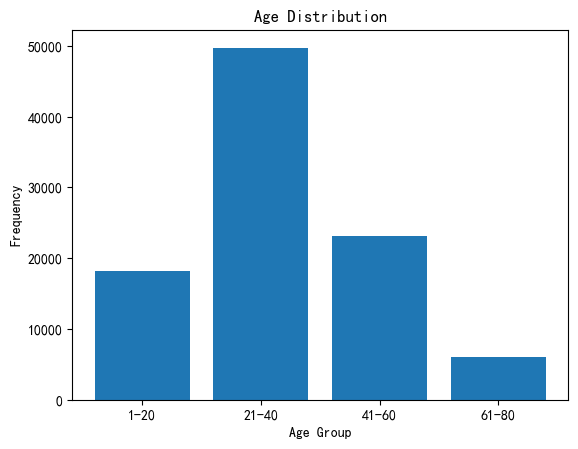

In [41]:
bins = [0, 20, 40, 60, 80]
labels = ['1-20', '21-40', '41-60', '61-80']
merged_data_new3['age_group'] = pd.cut(merged_data_new3['age'], bins=bins, labels=labels)
# 统计每个年龄区间的出现次数，并按照年龄从小到大排序
age_counts = data['age_group'].value_counts().sort_index()

# 绘制频数直方图
plt.bar(age_counts.index, age_counts.values)
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

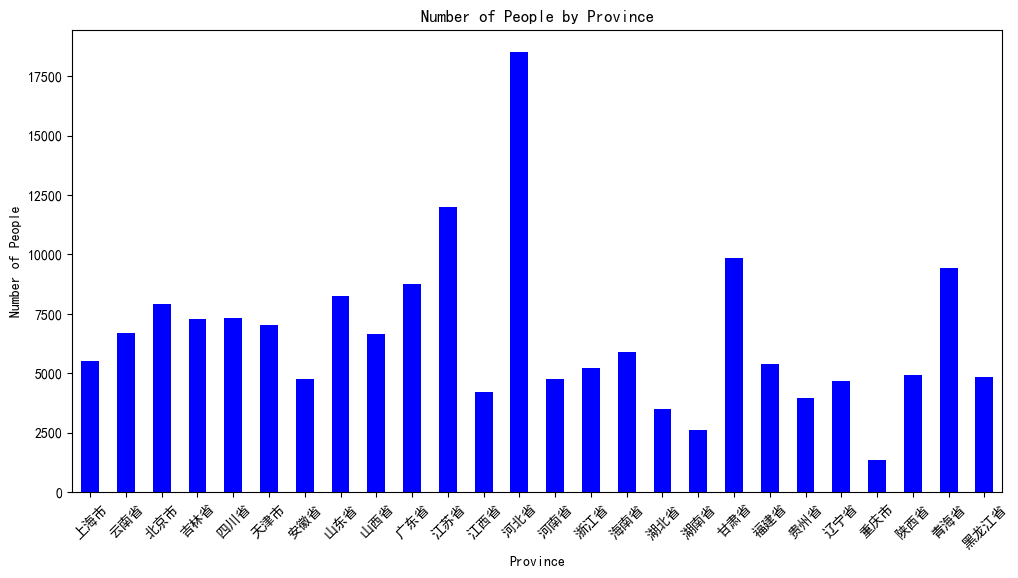

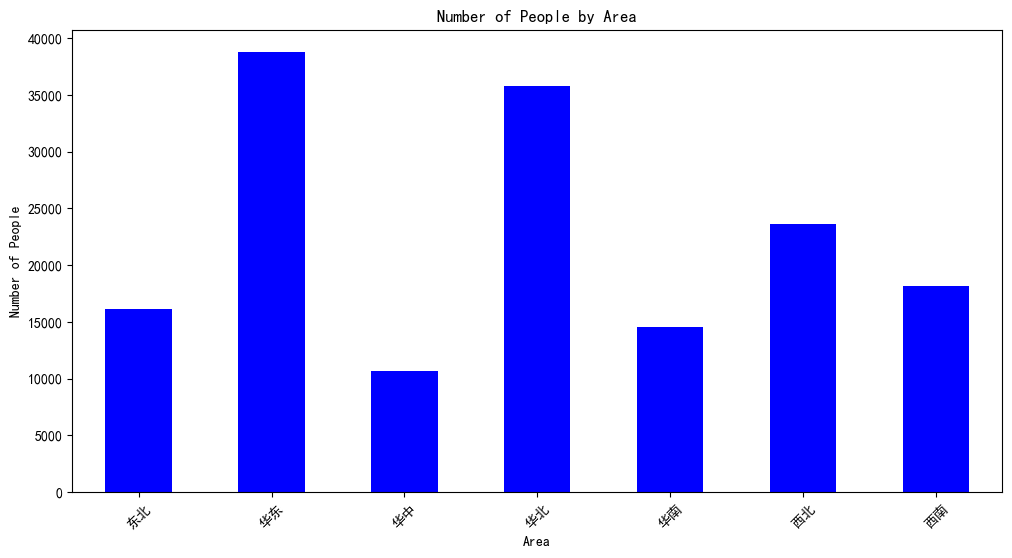

In [32]:
# 根据province计算人数并绘制图表
people_count_province = merged_data_new3.groupby('province')['user_id'].nunique()
plt.figure(figsize=(12, 6))
people_count_province.plot(kind='bar', color='blue')
plt.title('Number of People by Province')
plt.xlabel('Province')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.show()

# 根据area计算人数并绘制图表
people_count_area = merged_data_new3.groupby('area')['user_id'].nunique()
plt.figure(figsize=(12, 6))
people_count_area.plot(kind='bar', color='blue')
plt.title('Number of People by Area')
plt.xlabel('Area')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.show()



In [33]:
china_map.head()

,Z120401,Z121301,Z120402,Z120602,Z121102,Z121302,Z120403,Z120603,Z120703,Z120803,...,Rural_to_T,Sci_Eng_Co,Sec_Indust,Teri_Indus,Total_Coll,Urban_to_T,Vocation,DZM,NAME,geometry
0,745.9,9.16,38.1,487.5,6970.03,0.17,30.6,16.2,330.3,52.7,...,48.46,7.0,57.4,31.6,35.0,51.54,5.0,230000,黑龙江,"POLYGON ((1329152.341 5619034.278, 1323327.591..."
1,326.0,3.54,9.5,362.8,7649.96,0.16,6.4,11.1,274.3,43.1,...,66.18,2.0,43.0,35.9,16.0,33.82,1.0,650000,新疆,"POLYGON ((-2189253.375 4611401.367, -2202922.3..."
2,658.4,2.33,119.9,227.1,2245.66,0.07,54.4,24.9,84.4,40.8,...,65.09,4.0,50.3,38.7,24.0,34.91,3.0,140000,山西,"POLYGON ((761692.092 4443124.843, 760999.873 4..."
3,150.5,4.12,10.1,52.9,6983.16,0.16,15.5,5.1,18.7,14.5,...,67.57,0.0,45.2,37.5,6.0,32.43,1.0,640000,宁夏,"POLYGON ((-34477.046 4516813.963, -41105.128 4..."
4,88.8,2.33,1.7,29.1,15887.00,0.67,3.0,1.2,10.7,1.4,...,81.07,0.0,23.2,45.9,4.0,18.93,0.0,540000,西藏,"POLYGON ((-2189253.375 4611401.367, -2187861.9..."


In [34]:
print(set(china_map['NAME']) - set(merged_data_new3['province']))
print(set(merged_data_new3['province']) - set(china_map['NAME']))

{'广西', '宁夏', '香港', '海南', '山东', '西藏', '内蒙古', '山西', '甘肃', '澳门', '河北', '黑龙江', '云南', '辽宁', '上海', '浙江', '天津', '湖南', '安徽', '北京', '吉林', '湖北', '台湾', '陕西', '江西', '江苏', '重庆', '贵州', '河南', '青海', '福建', '四川', '广东', '新疆'}
{'云南省', '青海省', '上海市', '河南省', '四川省', '贵州省', '安徽省', '海南省', '江西省', '吉林省', '黑龙江省', '重庆市', '陕西省', '河北省', '湖南省', '甘肃省', '山东省', '天津市', '山西省', '福建省', '辽宁省', '江苏省', '湖北省', '浙江省', '广东省', '北京市'}


In [35]:
print(china_map.isna().sum().sum())
print(people_count_province.isna().sum())

1
0


In [36]:
print(china_map.geom_type)

0          Polygon
1          Polygon
2          Polygon
3          Polygon
4          Polygon
5          Polygon
6          Polygon
7          Polygon
8          Polygon
9          Polygon
10         Polygon
11         Polygon
12         Polygon
13         Polygon
14         Polygon
15         Polygon
16         Polygon
17         Polygon
18         Polygon
19         Polygon
20         Polygon
21         Polygon
22         Polygon
23         Polygon
24         Polygon
25         Polygon
26         Polygon
27    MultiPolygon
28    MultiPolygon
29         Polygon
30         Polygon
31    MultiPolygon
32    MultiPolygon
33         Polygon
dtype: object


In [37]:
china_map = china_map.explode()
china_map = gpd.GeoDataFrame(china_map)

C:\Users\23895\AppData\Local\Temp\ipykernel_18656\2337320925.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  china_map = china_map.explode()


In [38]:
for index, row in china_map.iterrows():
    if row['geometry'].geom_type == 'MultiPolygon':
        row['geometry'] = row['geometry'].boundary[0]

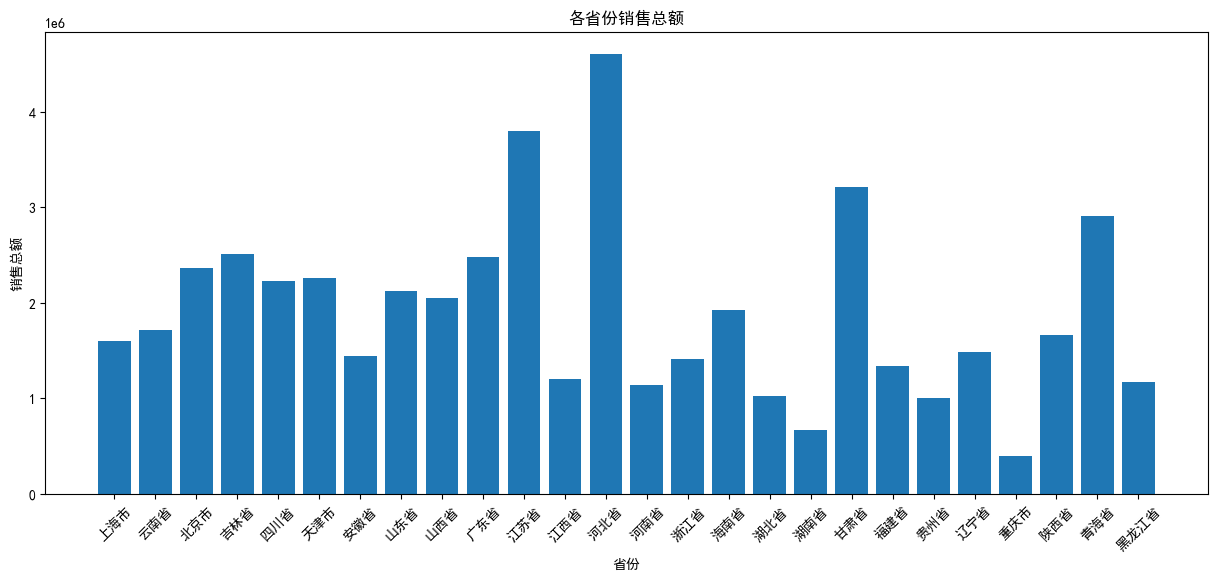

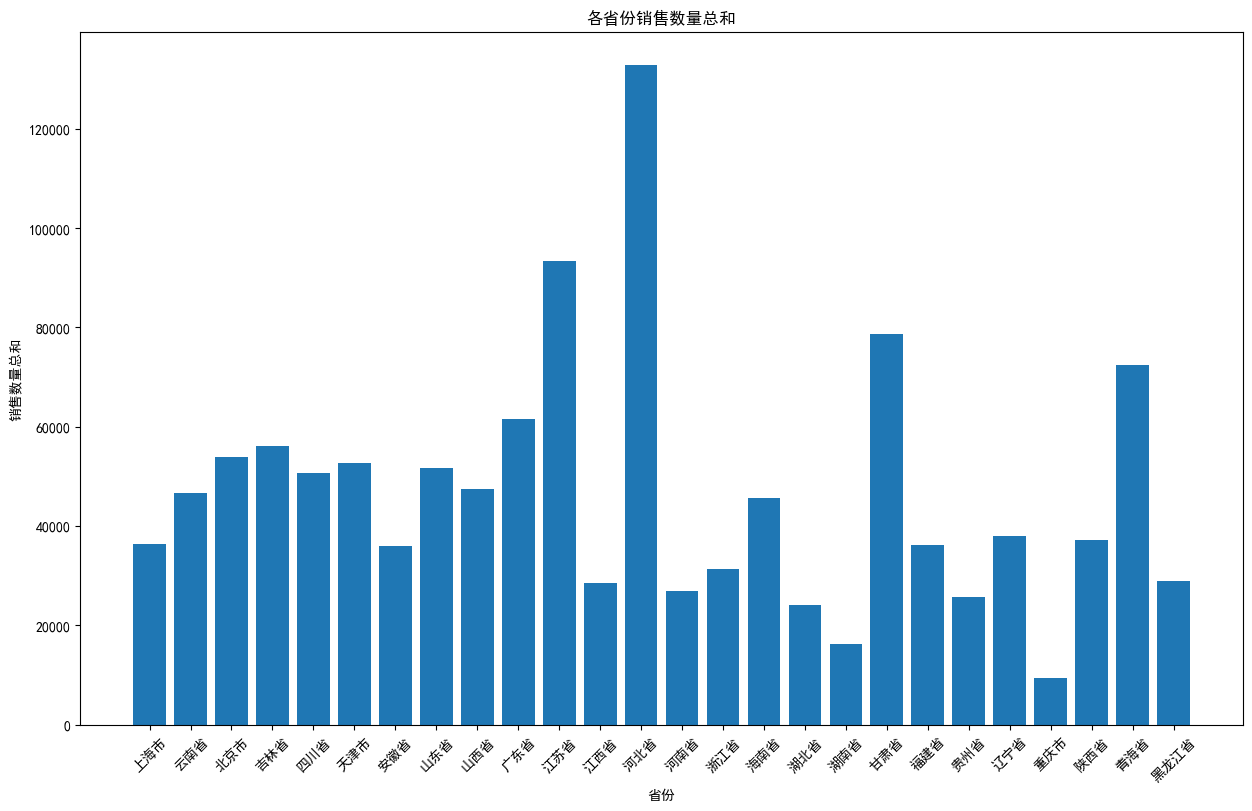

In [31]:
# 按province分组并计算amount和quantity的总和
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


# 按province分组并计算amount和quantity的总和
grouped = merged_data_new3.groupby('province').agg({'amount': 'sum', 'quantity': 'sum'}).reset_index()


# 绘制销售总额的柱状图
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.bar(grouped['province'], grouped['amount'])
ax1.set_xlabel('省份')
ax1.set_ylabel('销售总额')
ax1.set_title('各省份销售总额')
plt.xticks(rotation=45)

# 绘制销售数量总和的柱状图
fig, ax2 = plt.subplots(figsize=(15, 9))
ax2.bar(grouped['province'], grouped['quantity'])
ax2.set_xlabel('省份')
ax2.set_ylabel('销售数量总和')
ax2.set_title('各省份销售数量总和')
plt.xticks(rotation=45)

# 显示图表
plt.show()

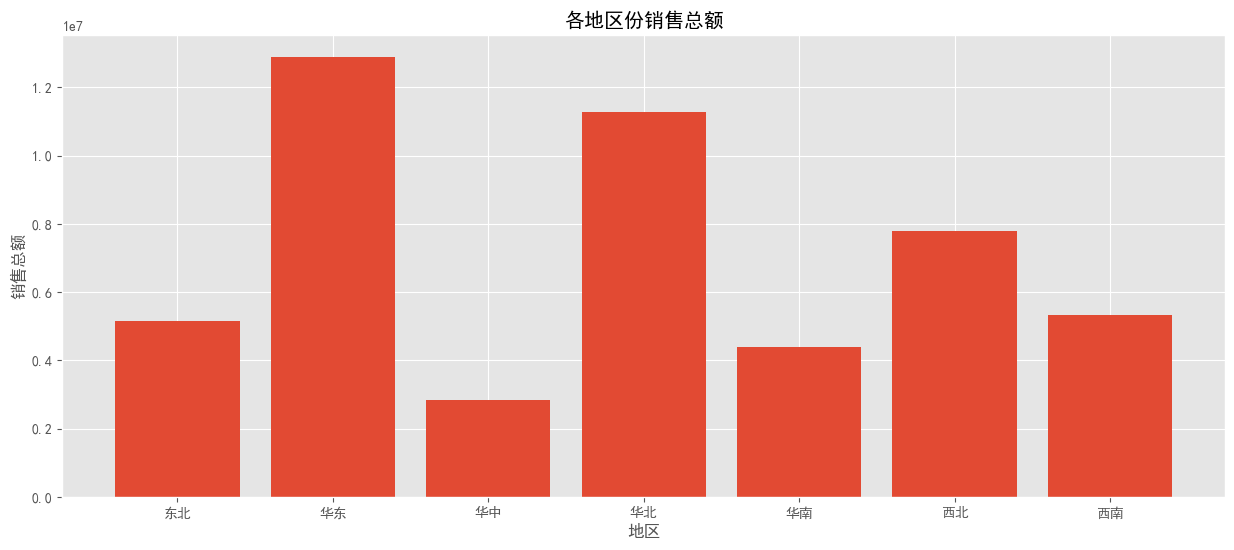

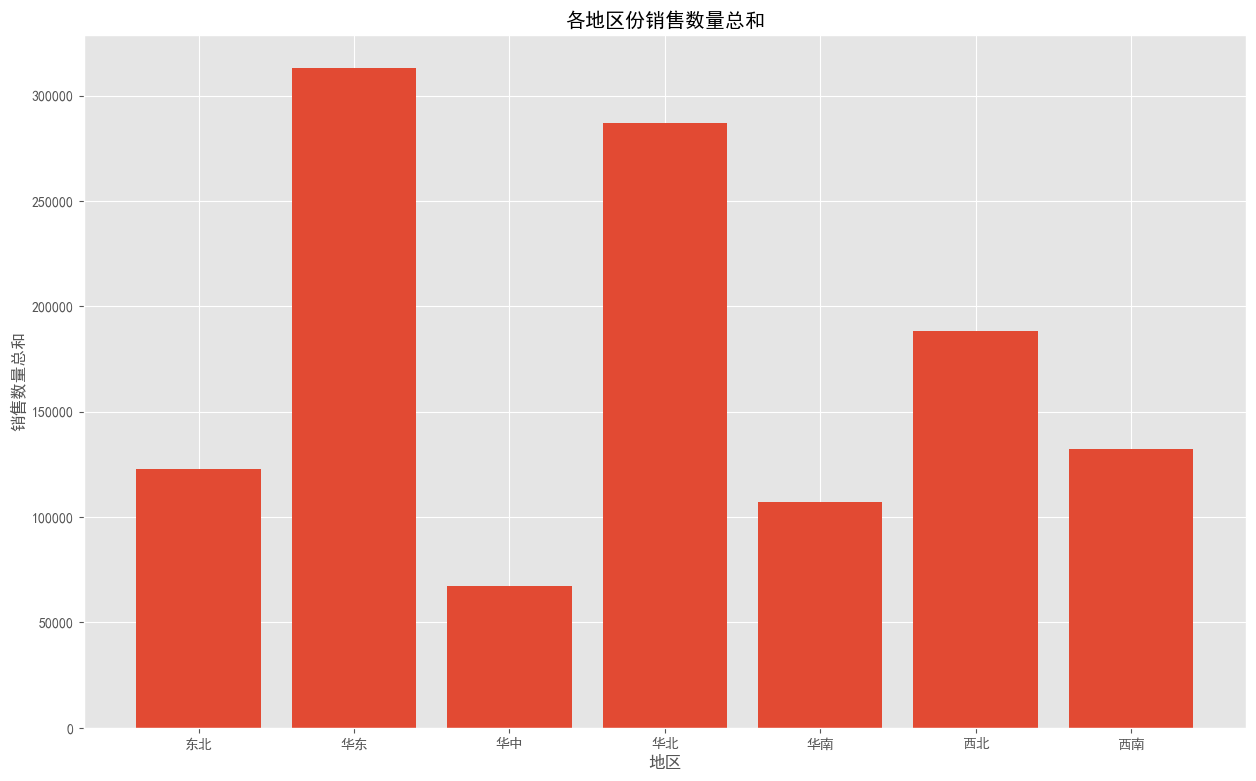

In [119]:
# 按area分组并计算amount和quantity的总和
grouped = merged_data_new3.groupby('area').agg({'amount': 'sum', 'quantity': 'sum'}).reset_index()


# 绘制销售总额的柱状图
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.bar(grouped['area'], grouped['amount'])
ax1.set_xlabel('地区')
ax1.set_ylabel('销售总额')
ax1.set_title('各地区份销售总额')

# 绘制销售数量总和的柱状图
fig, ax2 = plt.subplots(figsize=(15, 9))
ax2.bar(grouped['area'], grouped['quantity'])
ax2.set_xlabel('地区')
ax2.set_ylabel('销售数量总和')
ax2.set_title('各地区份销售数量总和')

# 显示图表
plt.show()

In [122]:
# 找出购买过多次的顾客
repurchasers = merged_data_new3[merged_data_new3.duplicated(subset=['user_id'], keep=False)]

In [123]:
# 按照province和area分组，并计算复购人数
repurchase_count = repurchasers.groupby(['province', 'area'])['user_id'].nunique().reset_index()
repurchase_count.columns = ['province', 'area', 'repurchase_count']

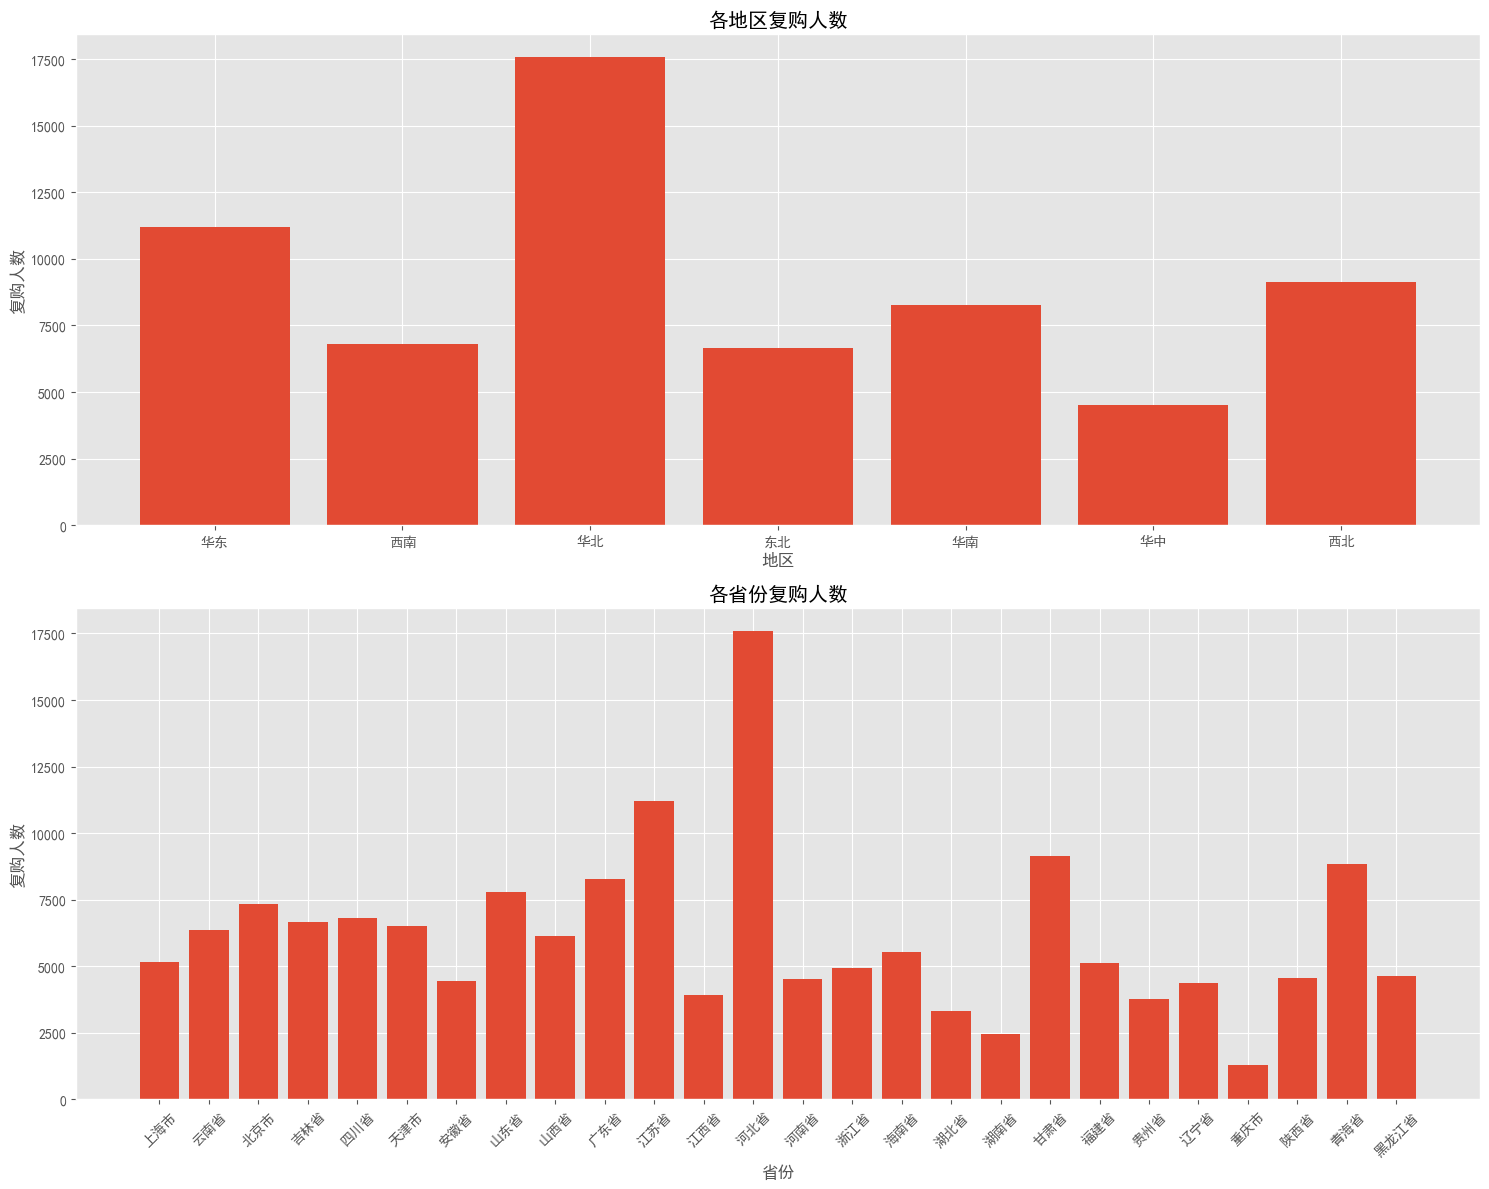

In [191]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))  # 创建两行一列的子图，设置图形尺寸为8x12英寸

ax[0].bar(repurchase_count['area'], repurchase_count['repurchase_count'])
ax[0].set_title('各地区复购人数')
ax[0].set_xlabel('地区')
ax[0].set_ylabel('复购人数')

ax[1].bar(repurchase_count['province'], repurchase_count['repurchase_count'])
ax[1].set_title('各省份复购人数')
ax[1].set_xlabel('省份')
ax[1].set_ylabel('复购人数')
plt.xticks(rotation=45)

plt.tight_layout()  # 调整子图之间的间距，以确保它们不会重叠
plt.show()

In [142]:
# 计算总客户人数
total_customer_count = merged_data_new3.groupby(['province', 'area'])['user_id'].nunique().reset_index()
total_customer_count.columns = ['province', 'area', 'total_customer_count']

# 合并数据，并计算复购率
merged_df = pd.merge(total_customer_count, repurchase_count, on=['province', 'area'], how='left')
merged_df['repurchase_rate'] = merged_df['repurchase_count'] / merged_df['total_customer_count']

# 将结果按照复购率降序排列
merged_df_sorted = merged_df.sort_values('repurchase_rate', ascending=False)

# 打印索引为province的结果
print("按省份打印复购率：")
print(merged_df_sorted.set_index('province')['repurchase_rate'])

按省份打印复购率：
province
福建省     0.955704
黑龙江省    0.955052
贵州省     0.951998
云南省     0.950224
河北省     0.949376
山东省     0.947681
河南省     0.946882
重庆市     0.945175
广东省     0.943804
湖北省     0.941880
浙江省     0.939076
海南省     0.938579
湖南省     0.938509
青海省     0.937639
安徽省     0.935552
上海市     0.935079
辽宁省     0.934685
江苏省     0.933812
江西省     0.932809
四川省     0.928484
甘肃省     0.925840
山西省     0.925373
天津市     0.924268
北京市     0.923077
陕西省     0.922921
吉林省     0.917034
Name: repurchase_rate, dtype: float64


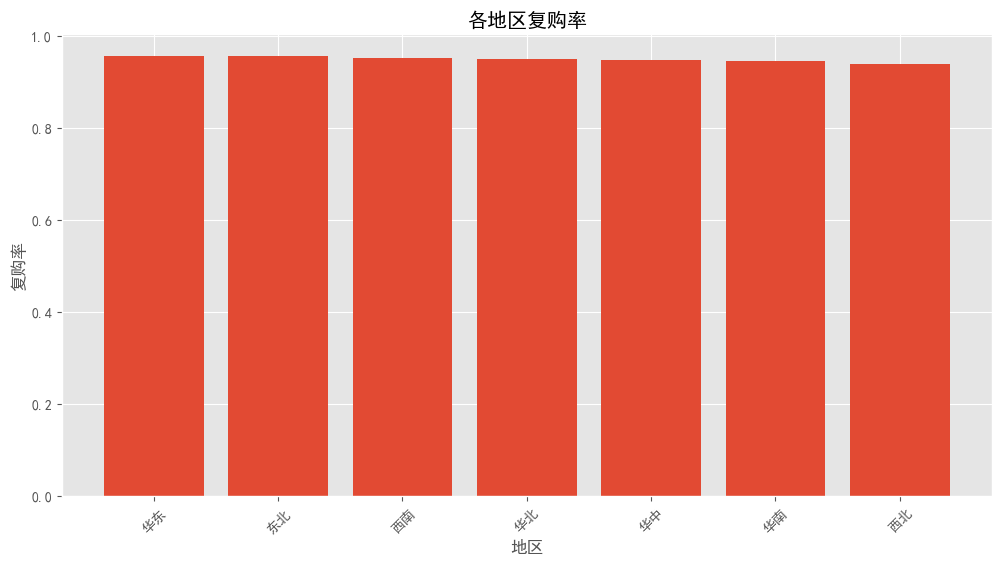

In [138]:
# 计算不同地区的复购率
merged_df['repurchase_rate'] = merged_df['repurchase_count'] / merged_df['total_customer_count']

# 按复购率降序对地区进行排序
merged_df.sort_values('repurchase_rate', ascending=False, inplace=True)

# 创建柱状图
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(merged_df['area'], merged_df['repurchase_rate'])
ax.set_title('各地区复购率')
ax.set_xlabel('地区')
ax.set_ylabel('复购率')
ax.tick_params(axis='x', rotation=45)

# 显示图形
plt.show()

In [181]:
# 统计每个category的总购买次数和总用户数
category_summary = merged_data_new3.groupby('category').agg({'user_id': 'nunique', 'amount': 'count'})

# 计算每个category的复购次数
category_summary['repurchase_count'] = merged_data_new3[merged_data_new3['amount'] > 1].groupby('category')['user_id'].nunique()

# 计算每个category的复购率
category_summary['repurchase_rate'] = category_summary['repurchase_count'] / category_summary['user_id']

# 按照复购率降序排序
category_summary_sorted = category_summary.sort_values('repurchase_rate', ascending=False)

# 输出结果
print(category_summary_sorted[['repurchase_rate']])

          repurchase_rate
category                 
鱼_肉肠（ZF）         1.000000
米粉_面条_粥          0.989387
溶豆_泡芙_米饼         0.978710
肉_菜_水果松          0.978507
酸奶_奶酪            0.976474
饼干               0.973405
泥类               0.973240
维生素              0.967105
清火开胃             0.965087
营养素软糖            0.964706
钙                0.964552
休闲零食             0.963568
益生菌              0.962987
DHA              0.956956
营养补充剂            0.954037
饮料               0.949720
烹饪食材             0.929921
糖果（ZF）           0.928571


In [182]:
# 统计每个sub_category的总购买次数和总用户数
sub_category_summary = merged_data_new3.groupby('sub_category').agg({'user_id': 'nunique', 'amount': 'count'})

# 计算每个sub_category的复购次数
sub_category_summary['repurchase_count'] = merged_data_new3[merged_data_new3['amount'] > 1].groupby('sub_category')['user_id'].nunique()

# 计算每个sub_category的复购率
sub_category_summary['repurchase_rate'] = sub_category_summary['repurchase_count'] / sub_category_summary['user_id']

# 按照复购率降序排序
sub_category_summary_sorted = sub_category_summary.sort_values('repurchase_rate', ascending=False)

print(sub_category_summary_sorted[['repurchase_rate']])


              repurchase_rate
sub_category                 
干酪粉                  1.000000
鱼肠（ZF）               1.000000
鱼泥                   1.000000
口水饼干（ZF）             1.000000
米粉                   0.985327
DHA软糖                0.984881
维生素软糖                0.984694
抗过敏益生菌               0.983302
酱料                   0.982353
面条                   0.980531
牛肉松/酥/绒              0.980514
奶酪                   0.979167
滴剂钙                  0.977449
鱼虾松/酥/绒              0.976487
酸奶                   0.976441
溶豆                   0.973720
蛋卷/蛋酥                0.971786
动物DHA                0.968905
蔬菜泥                  0.967993
维生素D3                0.966915
维生素AD                0.966388
混合泥                  0.966310
果泥                   0.965689
米饼                   0.965574
清火开胃冲剂               0.965087
鱼/肉肠                 0.964201
饼干                   0.963649
含乳饮料                 0.962211
综合益生菌                0.961979
维生素C                 0.960732
保健食品乳铁蛋白调制乳粉         0.960396
磨牙/口水饼干   

In [186]:
# 首先计算用户首次购买时间
first_purchase = merged_data_new3.groupby('user_id')['date'].min().reset_index()
first_purchase.columns = ['user_id', 'first_purchase_date']

# 将首次购买时间与原始数据合并
merged_data_with_first_purchase = pd.merge(merged_data_new3, first_purchase, on='user_id')

# 确保首次购买日期列被正确地创建
merged_data_with_first_purchase['first_purchase_date'] = pd.to_datetime(merged_data_with_first_purchase['first_purchase_date'])

# 计算用户的留存时间
merged_data_with_first_purchase['retention_days'] = (merged_data_with_first_purchase['date'] - merged_data_with_first_purchase['first_purchase_date']).dt.days

# 找出留存时间小于等于60天的用户
retained_users = merged_data_with_first_purchase[merged_data_with_first_purchase['retention_days'] <= 60]

# 根据province计算留存用户和总用户数
total_users_per_province = merged_data_with_first_purchase.groupby('province')['user_id'].nunique()
retained_users_per_province = retained_users.groupby('province')['user_id'].nunique()

# 计算留存比例
retention_rate_per_province = (retained_users_per_province / total_users_per_province).fillna(0)

# 对留存比例进行降序排序
retention_rate_per_province = retention_rate_per_province.sort_values(ascending=False)

print(retention_rate_per_province)


province
吉林省     0.762245
江苏省     0.754027
甘肃省     0.743938
山西省     0.736469
陕西省     0.730223
浙江省     0.726891
青海省     0.712059
辽宁省     0.710779
海南省     0.703892
四川省     0.693638
广东省     0.676985
北京市     0.672257
天津市     0.658568
上海市     0.658483
重庆市     0.649123
福建省     0.629816
安徽省     0.627211
湖北省     0.616524
江西省     0.616393
河北省     0.585121
云南省     0.562444
山东省     0.556203
黑龙江省    0.552371
河南省     0.549024
湖南省     0.546887
贵州省     0.540839
Name: user_id, dtype: float64
